In [1]:
# Datasets : 

# https://bioinformaticsworkbook.org/tutorials/wgcna.html#gsc.tab=0
# https://fuzzyatelin.github.io/bioanth-stats/module-F21-Group1/module-F21-Group1.html
# https://fuzzyatelin.github.io/bioanth-stats/module-25/module-25.html

# https://edu.sib.swiss/pluginfile.php/158/course/section/65/_01_SIB2016_wgcna.pdf
# https://pages.stat.wisc.edu/~yandell/statgen/ucla/WGCNA/wgcna.html
# Horvath S (2011) Weighted Network Analysis. Applications in Genomics and Systems Biology. Springer Book. ISBN: 978-1-4419-8818-8

In [2]:
library(tidyverse)
library(magrittr)      
library(WGCNA)        
library(flashClust)

# flashClust is an R package that provides a faster implementation of hierarchical clustering (hclust) for large datasets, 
# particularly useful in applications like WGCNA.

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following obje

In [3]:
setwd("/home/tanasa/WGCNA")
list.files()

[1] "ClinicalTraits.csv"        "GSE61333_ligule_count.txt"
[3] "LiverFemale3600.csv"       "LiverMale3600.csv"

In [4]:
# the article : https://pmc.ncbi.nlm.nih.gov/articles/PMC2631488/

# wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE61nnn/GSE61333/suppl/GSE61333_ligule_count.txt.gz
# gunzip GSE61333_ligule_count.txt.gz
# data <- readr::read_delim("data/GSE61333_ligule_count.txt", delim = "\t")

# https://rpubs.com/natmurad/WGCNA

# working with :
# wget 'https://raw.githubusercontent.com/fuzzyatelin/fuzzyatelin.github.io/master/bioanth-stats/module-F21-Group1/FemaleLiver-Data/LiverFemale3600.csv'
# https://raw.githubusercontent.com/fuzzyatelin/fuzzyatelin.github.io/master/bioanth-stats/module-F21-Group1/FemaleLiver-Data/LiverMale3600.csv'
# https://raw.githubusercontent.com/fuzzyatelin/fuzzyatelin.github.io/master/bioanth-stats/module-F21-Group1/FemaleLiver-Data/ClinicalTraits.csv

In [5]:
# GPT4 : an overview of WCGNA

# ⚙️ WGCNA Algorithm: Step-by-Step

# Input :
#    A gene expresion matrix: genes × samples
#        Rows: (or transcripts)
#        Columns: samples (from conditions, timepoints, individuals, etc.)
#        Matrix should be normalized (e.g., log2(CPM + 1), vst, rlog)

# 🔢 Step 1: Compute pairwise correlations

# Input: matrix G (genes x samples)
# Output: symmetric correlation matrix S (genes x genes)
#
#    Compute Pearson correlation between all gene pairs:
#    sij=cor(xi,xj)
#    sij​=cor(xi​,xj​)

#    Matrix S=[sij]S=[sij​] is the similarity matrix

# 🔁 Step 2: Construct adjacency matrix using soft thresholding

# Input: similarity matrix S
# Output: adjacency matrix A (genes x genes)

#    Apply a power adjacency function to emphasize strong correlations:
#    aij=∣sij∣β
#    aij​=∣sij​∣β

#  where β i a soft-thresholding power, chosen so the resulting network approximates a scale-free topology 
# (i.e., few hubs with many connections).

#    this step produces the adjacency matrix AA, encoding the connection strength between each gene pair.

# 🔄 Step 3: Compute Topological Overlap Matrix (TOM)

# Input: adjacency matrix A
# Output: TOM matrix T (genes x genes)

#    TOM quantifies shared neighbors between gene pairs and provides a more biologically robust similarity measure:
#    TOMij=lij+aijmin⁡(ki,kj)+1−aij
#    TOMij​=min(ki​,kj​)+1−aij​lij​+aij​​

#    where:
#        lij=∑uaiu⋅ajulij​=∑u​aiu​⋅aju​: number of shared neighbors
#        ki=∑uaiuki​=∑u​aiu​: connectivity of node ii

#    Result: a smoother, more biologically meaningful similarity matrix

# 🌳 Step 4: Hierarchical clustering of genes

# Input: dissimilarity = 1 - TOM
# Output: dendrogram of genes

#  Use 1−TOM1 : TOM as a distance matrix

#  Apply hierarchical clustering (average linkage)
#  The result is a dendrogram representing gene co-expression structure

# 🎨 Step 5: Identify modules via dynamic tree cut

# Input: gene dendrogram
# Output: module labels (e.g., colors or cluster IDs)

#    Cut the dendrogram using dynamic tree cut:
#        Identifies branches representing distinct gene co-expression modules
#        Parameters control minimum module size, deep split level, etc.
#    Each gene is assigned a module label (color or number)

# 📈 Step 6: Compute module eigengenes

# Input: module labels, original expression matrix
# Output: module eigengenes (1 per module)

#    For each module:

#        Calculate the module eigengene (ME) — first principal component of the expression profiles of genes in the module:
#        MEk=PC1(Gk)
#        MEk​=PC1​(Gk​)

#    The ME summarizes the module’s overall expression pattern across samples

# 🧪 Step 7: Relate modules to traits

# Input: module eigengenes, sample traits
# Output: module–trait correlation matrix

#    Correlate each module eigengene with external sample traits (e.g., clinical, environmental, experimental)
#    cor(MEk,Trait)
#    cor(MEk​,Trait)

#    Produces:
#        Correlation matrix
#        P-value matrix
#        Heatmap visualization

# 🧩 Step 8: Identify key genes (hub genes)

#    Module Membership (MM): correlation of a gene with its module eigengene
#    MMik = cor(xi,MEk)
#    MMik​ = cor(xi​,MEk​)

#    Gene Significance (GS): correlation between a gene’s expression and the trait
#    GSi=cor(xi,Trait)
#    GSi​=cor(xi​,Trait)

#    Genes with high MM + high GS are considered hub genes in biologically relevant modules

# 🧮 Summary of Core Matrices :

# Matrix	Shape	Meaning
# Expression matrix	         genes × samples	Normalized input
# Similarity (S)	         genes × genes	Pairwise correlation
# Adjacency (A)	             genes × genes	Soft-thresholded similarity
# TOM	                     genes × genes	Shared neighborhood similarity
# Dissimilarity	             genes × genes	1−TOMij1−TOMij​
# Module eigengenes	samples × modules	PC1 of each module

In [6]:
# The following script WGCNA.r performs a Weighted Gene Co-expression Network Analysis (WGCNA) on gene expression data 
# from female mouse livers, aiming to identify gene modules and relate them to clinical traits.

# Google Gemini  : Here's a breakdown of the script's key steps and what each part accomplishes:

# 1. Data Loading and Preprocessing

#    Loads gene expression data from LiverFemale3600.csv.
#    Removes non-expression columns and transposes the data so that rows are samples and columns are genes.
#    Renames columns with gene IDs.

# 2. Outlier Detection

#    Uses goodSamplesGenes() to identify and remove genes and samples with too many missing values or zero variance.
#    Performs hierarchical clustering on samples to visually identify and remove outlier samples (e.g., "F2_221").

# 3. Network Construction: Choosing the Soft-Thresholding Power (β)

#    Explains that WGCNA uses weighted networks where connection strength is determined by a power function of the Pearson correlation coefficient.
#    The pickSoftThreshold() function is used to calculate a suitable soft-thresholding power (β). This parameter is crucial for constructing a scale-free network, where a few genes (hubs) have many connections and most genes have few.
#    The script plots the scale-free topology model fit (R2) and mean connectivity against different soft threshold powers to help in selecting the optimal β (aiming for R2 > 0.8 and minimizing connectivity loss). In this case, β=6 is chosen.
#    The adjacency() function then calculates the adjacency matrix using the chosen soft power.

# 4. Module Construction

#    Topological Overlap Matrix (TOM): The adjacency matrix is transformed into a Topological Overlap Matrix (TOM) and then into a TOM-based dissimilarity matrix (1 - TOM). TOM is preferred because it considers shared neighbors, leading to more biologically distinct modules.
#    Hierarchical Clustering: Hierarchical clustering is applied to the TOM dissimilarity matrix to create a gene dendrogram.
#    Dynamic Tree Cut: The cutreeDynamic() function is used to cut the dendrogram and identify gene modules, assigning each gene a module label (represented by a color). A minimum module size of 30 is recommended.
#    Module Eigengenes (MEs): moduleEigengenes() calculates the module eigengene for each module. An ME is the first principal component of the expression profiles of genes within a module, representing the module's overall expression pattern.

# 5. Module Merging

#    Modules with similar expression profiles (based on the correlation of their eigengenes) are merged using mergeCloseModules(). A height cut-off of 0.25 (corresponding to a correlation of 0.75) is used for merging.

# 6. Relating Modules to External Traits

#    Loads clinical trait data from ClinicalTraits.csv.
#    Matches and aligns the sample names between the expression data and the clinical trait data.
#    Calculates the Pearson correlation and corresponding p-values between each merged module eigengene and the available clinical traits.
#    Visualizes these relationships using a labeledHeatmap(), showing strong positive correlations in red and strong negative correlations in blue.

# 7. Target Gene Identification (Hub Genes)

#    Gene Significance (GS): Calculates the correlation between each gene's expression and a specific trait (e.g., "weight_g").
#    Module Membership (MM): Calculates the correlation of each gene with its assigned module eigengene.
#    Genes with high module membership and high gene significance for a trait are considered potential hub genes within biologically relevant modules.
#    Scatter plots are generated to visualize the relationship between module membership and gene significance for specific modules (e.g., "magenta" and "purple").
#    plotEigengeneNetworks() is used to visualize the relationships among module eigengenes and traits.

In [7]:
d = "LiverFemale3600.csv"

# This .csv file contains quantified and normalized gene expression data from livers of several F2 female mice.

In [8]:
# GPT4: 

# The LiverFemale dataset in WGCNA is a built-in example dataset that contains female mouse liver gene expression data, 
# used primarily for teaching and demonstrating the workflow of WGCNA (Weighted Gene Co-expression Network Analysis).

# 🧬 What it contains:
# It is a microarray gene expression dataset derived from mouse liver tissue.

# Specifically, it contains expression levels from female mice, often across a genetically diverse panel 
# (e.g., from the BXD recombinant inbred strains).

# Often paired with a traitData dataset containing phenotypic traits (like body weight, fat percentage, etc.) for correlation analyses.

# ✅ What it is good for:
# Practicing the WGCNA pipeline, including:
# Data preprocessing
# Network construction
# Module detection
# Relating modules to external traits
# Hub gene analysis
# Understanding module-trait relationships, since the dataset includes phenotype traits like:
# Body weight
# Fat percentage
# Cholesterol levels
# and others

# 📚 How to load it:
# If using the official WGCNA tutorials:
# library(WGCNA)
# data(LiverFemale)

In [9]:
liver.data <- read.csv(file = d, stringsAsFactors = FALSE, header = TRUE)
head(liver.data, 2)
tail(liver.data, 2)

,substanceBXH,gene_symbol,LocusLinkID,ProteomeID,cytogeneticLoc,CHROMOSOME,StartPosition,EndPosition,F2_2,F2_3,⋯,F2_324,F2_325,F2_326,F2_327,F2_328,F2_329,F2_330,F2_332,F2_355,F2_357
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,MMT00000044,1700007N18Rik,69339,286025,0,16,50911260,50912491,-0.0181,0.0642,⋯,0.0477,-0.0488,0.0168,-0.0309,0.0274,-0.031,0.066,-0.0199,-0.0146,0.0650
2,MMT00000046,Mast2,17776,157466,0,4,115215318,115372404,-0.0773,-0.0297,⋯,-0.0492,-0.0350,-0.0738,-0.1730,-0.0738,-0.201,-0.082,-0.0939,0.0192,-0.0499


,substanceBXH,gene_symbol,LocusLinkID,ProteomeID,cytogeneticLoc,CHROMOSOME,StartPosition,EndPosition,F2_2,F2_3,⋯,F2_324,F2_325,F2_326,F2_327,F2_328,F2_329,F2_330,F2_332,F2_355,F2_357
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3599,MMT00082899,Crtac1,72832,327039,0,19,42335186,42385713,-0.00927,-0.1210,⋯,-0.0931,-0.288,-0.043,0.0368,0.0806,1.300,-0.00208,-0.1900,0.164,0.0878
3600,MMT00082906,Plagl1,22634,203073,10_15.0_cM,10,12916403,12955382,0.04360,0.0827,⋯,0.0942,-0.136,0.052,0.1300,0.0937,0.156,0.03610,0.0613,0.028,-0.0340


In [10]:
expression.data <- liver.data[,-c(1:8)] # removing variables not holding expression data
head(expression.data, 2)
tail(expression.data, 2)

,F2_2,F2_3,F2_14,F2_15,F2_19,F2_20,F2_23,F2_24,F2_26,F2_37,⋯,F2_324,F2_325,F2_326,F2_327,F2_328,F2_329,F2_330,F2_332,F2_355,F2_357
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.0181,0.0642,6.44e-05,-0.0580,0.0483,-0.1519741,-0.00129,-0.2360,-0.0307,-0.0261,⋯,0.0477,-0.0488,0.0168,-0.0309,0.0274,-0.031,0.066,-0.0199,-0.0146,0.0650
2,-0.0773,-0.0297,1.12e-01,-0.0589,0.0443,-0.0938000,0.09340,0.0269,-0.1330,0.0757,⋯,-0.0492,-0.0350,-0.0738,-0.1730,-0.0738,-0.201,-0.082,-0.0939,0.0192,-0.0499


,F2_2,F2_3,F2_14,F2_15,F2_19,F2_20,F2_23,F2_24,F2_26,F2_37,⋯,F2_324,F2_325,F2_326,F2_327,F2_328,F2_329,F2_330,F2_332,F2_355,F2_357
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3599,-0.00927,-0.1210,-0.1140,-0.0501,0.00718,0.3185700,-0.1820,-1.47000,0.469,-0.1980,⋯,-0.0931,-0.288,-0.043,0.0368,0.0806,1.300,-0.00208,-0.1900,0.164,0.0878
3600,0.04360,0.0827,-0.0872,-0.0390,0.07100,0.2047701,0.0619,-0.00794,-0.125,-0.0544,⋯,0.0942,-0.136,0.052,0.1300,0.0937,0.156,0.03610,0.0613,0.028,-0.0340


In [11]:
expression.data <- as.data.frame(t(expression.data)) # transforming the data.frame so columns now represent genes and rows represent samples
names(expression.data) <- liver.data$substanceBXH    # renaming the columns so we don't lose the gene IDs

In [12]:
# Identifying Outlier Genes

# The WGCNA package has a built in function to identify outlier genes called goodSampleGenes(). 
# The function checks the data and returns a list object of samples and genes that pass its filtering criteria

head(expression.data, 2)
tail(expression.data, 2)

,MMT00000044,MMT00000046,MMT00000051,MMT00000076,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,MMT00000212,⋯,MMT00082822,MMT00082828,MMT00082829,MMT00082832,MMT00082847,MMT00082850,MMT00082869,MMT00082877,MMT00082899,MMT00082906
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F2_2,-0.0181,-0.0773,-0.0226,-0.00924,-0.0487,0.176,0.0768,-0.148,0.0687,0.0609,⋯,0.01350,-0.1540,-0.0218,0.0310,0.129,0.0467,0.00991,0.0291,-0.00927,0.0436
F2_3,0.0642,-0.0297,0.0617,-0.14500,0.0582,-0.189,0.1860,0.177,0.1010,0.0557,⋯,-0.00971,-0.0741,0.0900,0.0106,0.113,-0.0252,0.03190,0.0408,-0.12100,0.0827


,MMT00000044,MMT00000046,MMT00000051,MMT00000076,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,MMT00000212,⋯,MMT00082822,MMT00082828,MMT00082829,MMT00082832,MMT00082847,MMT00082850,MMT00082869,MMT00082877,MMT00082899,MMT00082906
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F2_355,-0.0146,0.0192,0.109000,-0.0348,0.0512,-0.0399,-0.191,0.04490,-0.0597,-0.056,⋯,-0.1040,0.1420,0.0197,0.283,0.00722,0.0459,0.151,0.0448,0.1640,0.028
F2_357,0.0650,-0.0499,0.000253,0.1140,0.0243,0.0375,-0.357,0.00616,-0.0852,0.111,⋯,-0.0347,0.0591,-0.0173,0.119,-0.13700,-0.0397,0.165,-0.2000,0.0878,-0.034


In [13]:
gsg <- goodSamplesGenes(expression.data)
summary(gsg)
gsg$allOK

 Flagging genes and samples with too many missing values...
  ..step 1


            Length Class  Mode   
goodGenes   3600   -none- logical
goodSamples  135   -none- logical
allOK          1   -none- logical

[1] TRUE

In [14]:
# Should we have to remove samples or genes :

if (!gsg$allOK)
{

# Identifies and prints outlier genes
if (sum(!gsg$goodGenes)>0) 
printFlush(paste("Removing genes:", paste(names(expression.data)[!gsg$goodGenes], collapse = ", "))); 

# Identifies and prints oulier samples
# Removes the offending genes and samples from the data

if (sum(!gsg$goodSamples)>0)
printFlush(paste("Removing samples:", paste(rownames(expression.data)[!gsg$goodSamples], collapse = ", "))); 
    
expression.data <- expression.data[gsg$goodSamples == TRUE, gsg$goodGenes == TRUE] 
}

In [15]:
# Identifying outlier samples

# You can identify outlier samples by using hierarchical clustering. 

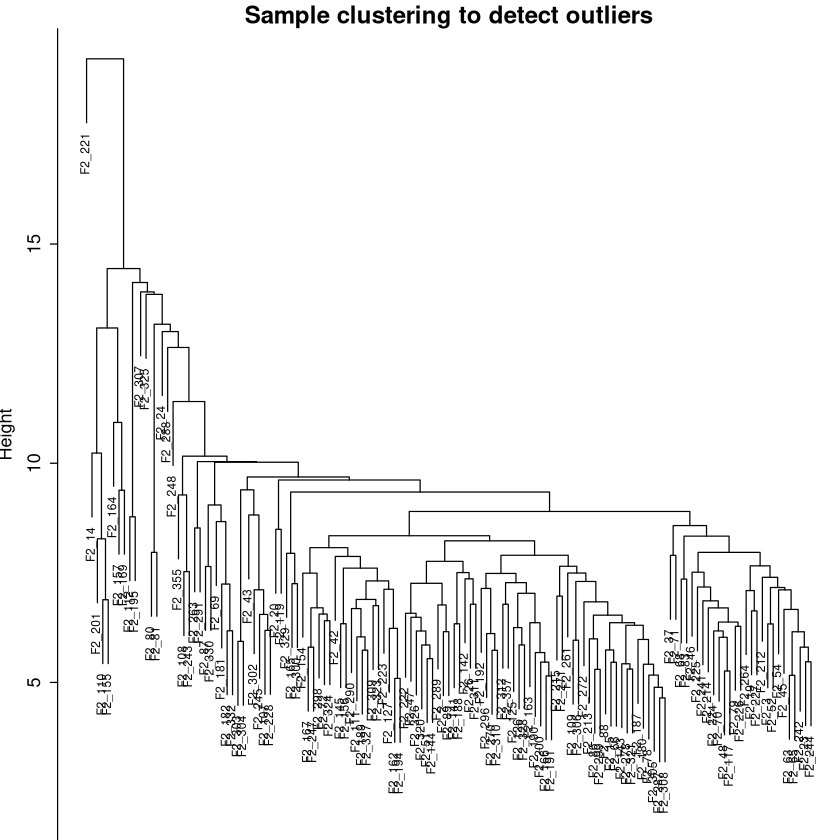

In [16]:
sampleTree <- hclust(dist(expression.data), method = "average") # Clustering samples based on distance 

# Setting the graphical parameters
par(cex = 0.6)          # cex controls the scaling of text elements (like axis labels, titles, etc.).
par(mar = c(0,4,2,0))   # c(bottom, left, top, right) — so this line means:

# Plotting the cluster den drogram
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
cex.axis = 1.5, cex.main = 2)

# Here you can see sample F2_221 seems to be distant from all of the other samples indicating it is likely an outlier sample.

In [17]:
sampleTree


Call:
hclust(d = dist(expression.data), method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 135 


In [18]:
# Here you can see sample F2_221 seems to be distant from all of the other samples indicating it is likely an outlier sample.
cut.sampleTree <- cutreeStatic(sampleTree, cutHeight = 15, minSize = 10) # returns numerical vectors

# Remove outliers
expression.data <- expression.data[cut.sampleTree==1, ]
dim(expression.data)

[1]  134 3600

In [19]:
print("Network Construction")

print("Pairwise Gene Co-expression similarity")

# The WGCNA the similarity measurement for each pair of genes (gene i and gene j) is denoted by their Pearson correlation coefficient.

# Unsigned Networks
# For unsigned networks you take the absolute value of the correlation. 
# If the network is unsigned, you do not know 
# if the gene is up or down regulated in the sample trait, just that its expression is significantly different.

# Signed Networks

[1] "Network Construction"
[1] "Pairwise Gene Co-expression similarity"


In [20]:
print("Adjacency: Pairwise connection")

# The next step after calculating the similarity measurement for each gene pair is to translate that similarity measurement 
# into the gene pairs adjacency to generate an adjacency matrix. 
# Adjacency is the assignment of a connection strength based on the co-expression similarity measurement (Pearson correlation coefficient). 
# Nodes are considered connected if they have a significant pairwise correlation association.

# In unweighted networks, the adjacency matrix indicates whether or not a pair of nodes are connected in a binary fashion.

# Weighted Networks
# In weighted networks the adjacency/connection is not binary and therefore can also distinguish the strength of connection.
# Weighted networks utilize a power function based on a soft threshold parameter 𝛽

[1] "Adjacency: Pairwise connection"


In [21]:
# To determine the 𝛽 parameter in a weighted network analysis we try to maximize a model fit (𝑅2 value under a linear regression analysis) 
# under a scale free topology model, while minimizing the number of connections lost when fitting the model 
# (maintaining a high mean number of connections). 
# As 𝑅2 values approach 1, we usually see networks with very few connections. Usually this happy medium occurs at 𝑅2 of > .8.

# The scale-free topology is used because it is based on the idea that the probability that a node (gene) is connected with k other nodes 
# (genes) decays as a power law: 𝑝(𝑘)∼𝑘−𝛾

# In network theory, a scale-free topology refers to a type of network where:
# 🔑 Some nodes (called hubs) have many more connections than others, and
# 📈 The node degree distribution follows a power law : P(k) ∝ k⁻ᵞ, where P(k) is the probability a node has k connections.

# The pickSoftThreshold() function calculates multiple networks all based on different 𝛽 values and returns a data frame 
# with the 𝑅2 values for the networks scale-free topology model fit as well as the mean connectivity measures.

In [22]:
spt <- pickSoftThreshold(expression.data) 
str(spt)

# You can then plot this data frame to better visualize what 𝛽 value you should choose.
# REMINDER : we should be maximizing the 𝑅2 value and minimizing mean connectivity.

Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1   0.0278  0.345          0.456  747.00  762.0000 1210.0
2      2   0.1260 -0.597          0.843  254.00  251.0000  574.0
3      3   0.3400 -1.030          0.972  111.00  102.0000  324.0
4      4   0.5060 -1.420          0.973   56.50   47.2000  202.0
5      5   0.6810 -1.720          0.940   32.20   25.1000  134.0
6      6   0.9020 -1.500          0.962   19.90   14.5000   94.8
7      7   0.9210 -1.670          0.917   13.20    8.6800   84.1
8      8   0.9040 -1.720          0.876    9.25    5.3900   76.3
9      9   0.8590 -1.700          0.836    6.80    3.5600   70.5
10    10   0.8330 -1.660          0.831    5.19    2.3800   65.8
11    12   0.8530 -1.480          0.911    3.33    1.1500   58.1
12    14   0.8760 -1.380          0.949    2.35    0.5740   51.9
13    16   0.9070 -1.300          0.970    1.77    0.3090   46.8
14    18   0.9120 -1.240          0.973    1.39    0.1670   42.5
15    20   0.9310 -1.210 

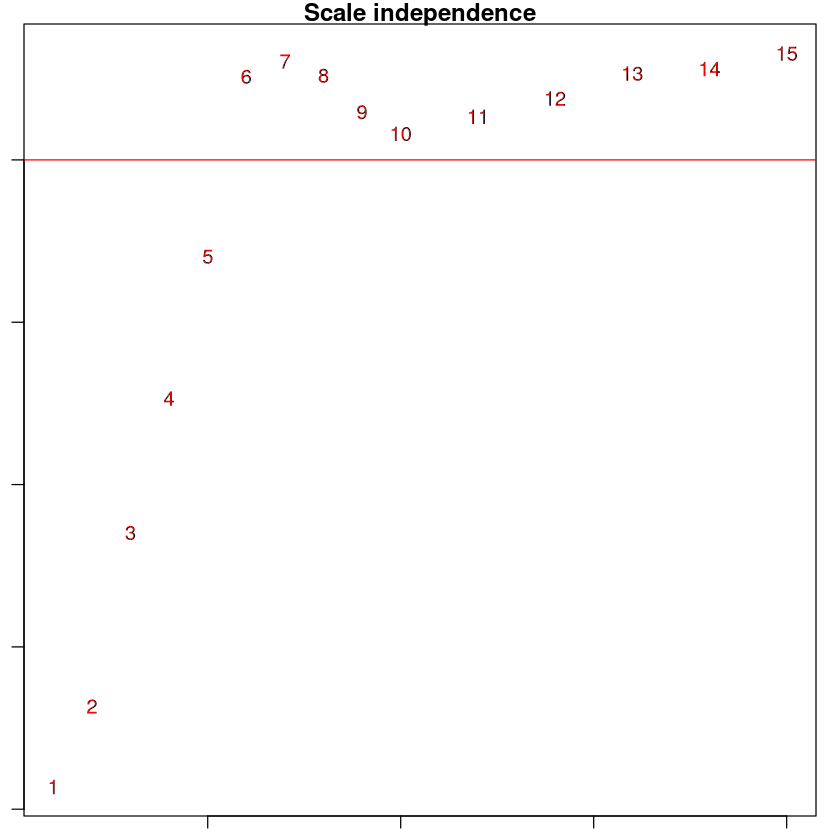

In [23]:
# Plot the 𝑅2 values as a function of the soft thresholds.

par(mar=c(1,1,1,1))
plot(spt$fitIndices[,1], spt$fitIndices[,2],
     xlab = "Soft Threshold (power)",
     ylab = "Scale Free Topology Model Fit,signed R^2", 
     type="n",
     main = paste("Scale independence"))

text(spt$fitIndices[,1],spt$fitIndices[,2],col="red")
abline(h=0.80,col="red")

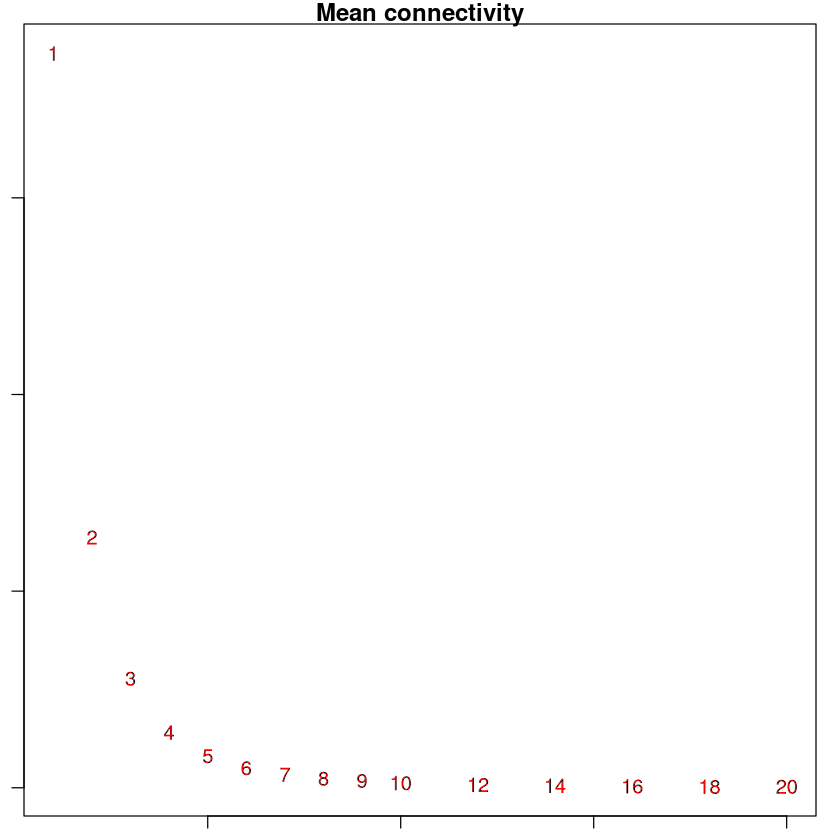

In [24]:
# Plot mean connectivity as a function of soft thresholds

par(mar=c(1,1,1,1))
plot(spt$fitIndices[,1], 
     spt$fitIndices[,5],
     xlab="Soft Threshold (power)", 
     ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(spt$fitIndices[,1], spt$fitIndices[,5], labels= spt$fitIndices[,1],col="red")

In [25]:
# You can determine the soft power threshold should be set to 6 as it is the spt that retains the highest mean connectivity 
# while reaching an 𝑅2 value above 0.80.

In [26]:
print("Calling the Adjacency Function")

# Now that you have the soft threshold power determined you can call on the adjacency() function of the WGCNA package.
# This function calculates the similarity measurement and transforms the similarity by the adjacency function 
# and generates a weighted network adjacency matrix.

softPower <- 6
adjacencyResult <- adjacency(expression.data, power = softPower)

head(adjacencyResult, 2)
tail(adjacencyResult, 2)

[1] "Calling the Adjacency Function"


,MMT00000044,MMT00000046,MMT00000051,MMT00000076,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,MMT00000212,⋯,MMT00082822,MMT00082828,MMT00082829,MMT00082832,MMT00082847,MMT00082850,MMT00082869,MMT00082877,MMT00082899,MMT00082906
MMT00000044,1.00000e+00,2.99785e-09,6.581419e-07,2.279710e-04,6.430322e-06,9.807060e-08,2.300672e-06,1.480483e-11,4.593269e-07,5.943317e-09,⋯,2.679959e-06,1.524428e-06,3.854376e-07,3.848655e-08,1.480486e-07,5.834674e-05,5.217741e-06,1.623579e-05,0.0001083121,1.351008e-05
MMT00000046,2.99785e-09,1.00000e+00,3.216588e-02,6.390615e-10,6.203223e-08,3.754537e-02,2.624825e-04,9.883492e-07,3.271912e-05,3.514096e-03,⋯,6.603326e-02,2.129574e-02,6.281124e-05,1.234577e-05,4.314312e-02,1.782007e-02,5.227139e-28,3.032255e-04,0.0002363305,1.361381e-07


,MMT00000044,MMT00000046,MMT00000051,MMT00000076,MMT00000080,MMT00000102,MMT00000149,MMT00000159,MMT00000207,MMT00000212,⋯,MMT00082822,MMT00082828,MMT00082829,MMT00082832,MMT00082847,MMT00082850,MMT00082869,MMT00082877,MMT00082899,MMT00082906
MMT00082899,1.083121e-04,2.363305e-04,1.948148e-05,3.707837e-05,9.833817e-06,3.235541e-06,5.487757e-07,6.044754e-12,1.392022e-13,5.916032e-09,⋯,1.301377e-05,1.274602e-08,5.169438e-08,3.802095e-08,1.044610e-05,4.314360e-07,6.780945e-08,3.059600e-05,1.0000000000,0.0008144406
MMT00082906,1.351008e-05,1.361381e-07,4.107759e-22,4.154481e-05,2.806407e-02,8.083873e-12,4.086310e-04,1.682053e-07,3.100397e-02,2.231580e-07,⋯,1.019443e-05,3.296027e-05,3.299037e-02,7.264570e-07,3.780412e-05,3.962282e-16,3.035972e-04,2.531145e-05,0.0008144406,1.0000000000


In [27]:
print("Module Construction : Defining Dissimilarity")

# Once the network is constructed, you can begin to extract some meaningful relationships. 
# You can use hierarchical clustering yet again to cluster the network into modules.

# NOTE: A module is a group of gene profiles that are highly correlated, or have a high topological overlap.

# In order to utilize the clustering functions in R you must transform the adjacency matrix into measures of gene dissimilarity 
# (distance of a gene from every other gene in the system).

# NOTE: This is due to the fact that dissimilarity is used in traditional cluster analyses.

[1] "Module Construction : Defining Dissimilarity"


In [28]:
print("Topological Overlap Matrix")

# The TOM-based dissimilarity is preferentially used over dissimilarity based on correlation coefficients because 
# TOM-based dissimilarity generates more distinct modules.

# TOMsimilarity # Calculation of the topological overlap matrix, and the corresponding dissimilarity, from a given adjacency matrix. 

TOM <- TOMsimilarity(adjacencyResult)
head(TOM, 2)
tail(TOM, 2)

[1] "Topological Overlap Matrix"
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


1.0000000000,0.0007954678,0.0006276637,0.0006970912,0.0009450174,0.0001660684,0.0006978152,7.477924e-05,0.000226179,6.150934e-05,⋯,0.0005496512,0.001035166,0.0004333163,9.077774e-05,0.001662004,0.0006109597,0.0001894023,0.0001343585,0.005547472,0.0003524307
0.0007954678,1.0000000000,0.0478588481,0.0000614485,0.0006473520,0.0285834274,0.0118129157,1.714528e-03,0.002588548,3.666481e-02,⋯,0.0701888084,0.048099767,0.0021800328,1.687974e-03,0.073463498,0.0440080363,0.0015858975,0.0074392012,0.002127724,0.0001695718


"[3599,]",0.0055474722,0.0021277242,0.0010050652,0.0005089428,0.000156128,1.505710e-04,0.0005545367,6.534902e-05,0.0001741615,0.0002015434,⋯,0.0013569987,0.0004995120,0.0001093475,8.146749e-05,0.002392231,2.667191e-04,0.0000445970,0.000118101,1.0000000000,0.0008234752
"[3600,]",0.0003524307,0.0001695718,0.0003082823,0.0001793351,0.047432021,5.119614e-05,0.0070378638,5.863443e-04,0.1254700646,0.0002652161,⋯,0.0006080598,0.0004594333,0.0877205166,5.204076e-04,0.006447037,5.760784e-05,0.0002819943,0.001640795,0.0008234752,1.0000000000


In [29]:
# To convert this matrix into a dissimilarity matrix you can subtract the TOM object from 1.

TOM.dissimilarity <- 1 - TOM

In [30]:
print("Hierarchical Clustering Analysis")

# The dissimilarity/distance measures are then clustered using linkage hierarchical clustering and a dendrogram (cluster tree) of genes 
# is constructed.

# creating the dendrogram 
geneTree <- hclust(as.dist(TOM.dissimilarity), method = "average") 
geneTree

# plotting the dendrogram
sizeGrWindow(12,9)
plot(geneTree, xlab="", sub="", 
     main = "Gene clustering on TOM-based dissimilarity", 
     labels = FALSE, 
     hang = 0.04)

[1] "Hierarchical Clustering Analysis"



Call:
hclust(d = as.dist(TOM.dissimilarity), method = "average")

Cluster method   : average 
Number of objects: 3600 


In [31]:
# To identify modules from this gene dendrogram, you can use the cutreeDynamic() function : it will allow you to set a minimum cluster size. 
# For genomics data it is more beneficial to set minimum module sizes relatively high as you are working with high loads of data. 
# The authors of WGCNA recommend to start at a minClusterSize = 30.

Modules <- cutreeDynamic(dendro = geneTree, 
                         distM = TOM.dissimilarity, 
                         deepSplit = 2, 
                         pamRespectsDendro = FALSE, 
                         minClusterSize = 30)

 ..cutHeight not given, setting it to 0.996  ===>  99% of the (truncated) height range in dendro.
 ..done.


In [32]:
head(Modules)
tail(Modules)

table(Modules) # it returns a table of the counts of factor levels in an object.
               # i.e.  how many genes are assigned to each created module. 

20 20 12  2 23 
 0  1  1 21  2 14

20 14  6 17     5 
 1 11 17  3  0  7

Modules
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19 
 88 614 316 311 257 235 225 212 158 153 121 106 102 100  94  91  78  76  65  58 
 20  21  22 
 58  48  34 

In [33]:
ModuleColors <- labels2colors(Modules) # it assigns each module number a color
table(ModuleColors)                    # it returns the counts for each color (aka the number of genes within each module)

ModuleColors
       black         blue        brown         cyan    darkgreen      darkred 
         212          316          311           94           34           48 
       green  greenyellow         grey       grey60    lightcyan   lightgreen 
         235          106           88           76           78           65 
 lightyellow      magenta midnightblue         pink       purple          red 
          58          153           91          158          121          225 
   royalblue       salmon          tan    turquoise       yellow 
          58          100          102          614          257 

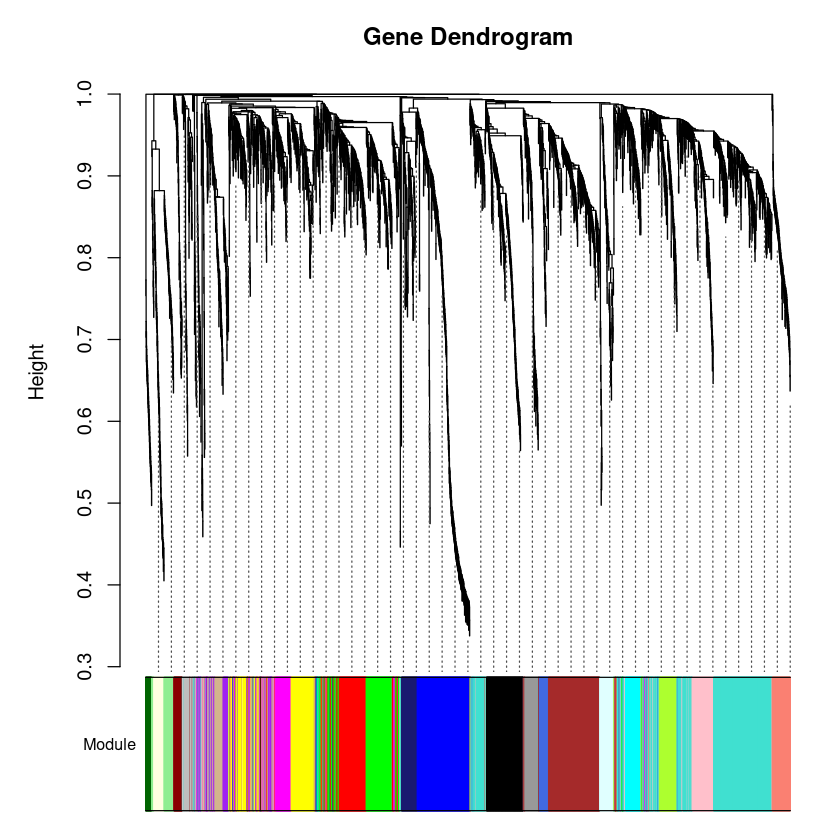

In [34]:
# it plots the gene dendrogram with the module colors

plotDendroAndColors(geneTree, ModuleColors,"Module",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene Dendrogram")

In [35]:
print("Module Eigengene Identification")

# A ME (Module Eigengene) is the standardized gene expression profile for a given module.
# To identify the Module Eigengene you can call on the expression data into the moduleEigengenes() function.

MElist <- moduleEigengenes(expression.data, colors = ModuleColors) 
MEs <- MElist$eigengenes 
head(MEs, 2)
tail(MEs, 2)

[1] "Module Eigengene Identification"


,MEblack,MEblue,MEbrown,MEcyan,MEdarkgreen,MEdarkred,MEgreen,MEgreenyellow,MEgrey,MEgrey60,⋯,MEmagenta,MEmidnightblue,MEpink,MEpurple,MEred,MEroyalblue,MEsalmon,MEtan,MEturquoise,MEyellow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F2_2,0.01390248,0.0410177922,0.007072125,0.12978459,0.006276361,0.006971934,-0.13278003,0.04138109,-0.00557511,0.02466696,⋯,-0.06241287,-0.08179216,-0.085323887,-0.06683572,-0.11834913,-0.01614832,0.01027522,-0.1345626,0.02035156,-0.06492433
F2_3,0.06667534,-0.0009540238,0.072447744,-0.07777835,0.010326534,-0.016017527,-0.03032564,-0.02369461,0.01340919,0.01111424,⋯,0.01915760,0.09657692,-0.003466306,0.14806794,-0.05146571,0.09714258,-0.01367097,0.0925069,0.03761149,-0.05413496


,MEblack,MEblue,MEbrown,MEcyan,MEdarkgreen,MEdarkred,MEgreen,MEgreenyellow,MEgrey,MEgrey60,⋯,MEmagenta,MEmidnightblue,MEpink,MEpurple,MEred,MEroyalblue,MEsalmon,MEtan,MEturquoise,MEyellow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F2_355,-0.1160729,-0.22608566,-0.06275888,-0.16959605,-0.03697966,0.04092096,0.16254349,0.03480220,0.001204553,-0.01979515,⋯,-0.073502034,0.00800635,0.24502676,-0.01800799,0.21067584,0.05107969,0.007951388,0.05761451,-0.09662657,0.013139674
F2_357,-0.1153731,-0.01689313,-0.17209400,0.07745659,0.03248305,-0.02468995,-0.01766219,0.02811257,0.063935208,-0.09842914,⋯,-0.006628486,0.07698491,0.09541117,0.02423661,0.01217411,-0.13387128,-0.020279886,0.09482483,-0.07019060,-0.002946816


In [36]:
print("Module Merging")

[1] "Module Merging"


In [37]:
# To further condense the clusters (branches) into more meaningful modules you can cluster modules based on pairwise eigengene correlations 
# and merge the modules that have similar expression profiles.
# REMINDER: An eigengene is the gene whose expression is representative of the the majority of genes expressed within a module.

In [38]:
ME.dissimilarity = 1 - cor(MElist$eigengenes, use="complete") #Calculate eigengene dissimilarity

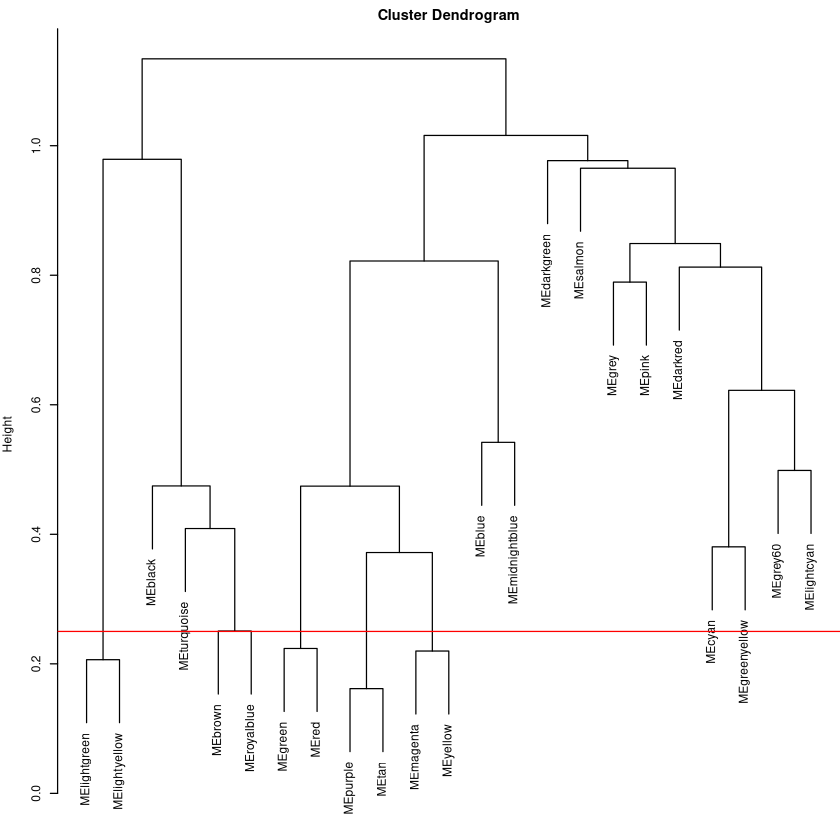

In [39]:
METree = hclust(as.dist(ME.dissimilarity), method = "average") # Clustering eigengenes 
par(mar = c(0,4,2,0))                                          # seting margin sizes
par(cex = 0.6)                                                 # scaling the graphic
plot(METree)
abline(h=.25, col = "red") #a height of .25 corresponds to correlation of .75

In [40]:
# This figure shows all of the modules which are more than 75% similar. 
# For example you can see that MEcyan and MEpurple are more than 75% similar. 
# Now you can merge these two modules, and others like them using the mergeCloseModules().

In [41]:
# Merge modules whose dissimilarity is below the cutoff !
# corFnc=“pearson”; power=6; min. module size=30

In [42]:
merge <- mergeCloseModules(expression.data, ModuleColors, cutHeight = .25)

 mergeCloseModules: Merging modules whose distance is less than 0.25
   Calculating new MEs...


In [43]:
# The merged module colors, assigning one color to each module
mergedColors = merge$colors

# Eigengenes of the new merged modules
mergedMEs = merge$newMEs

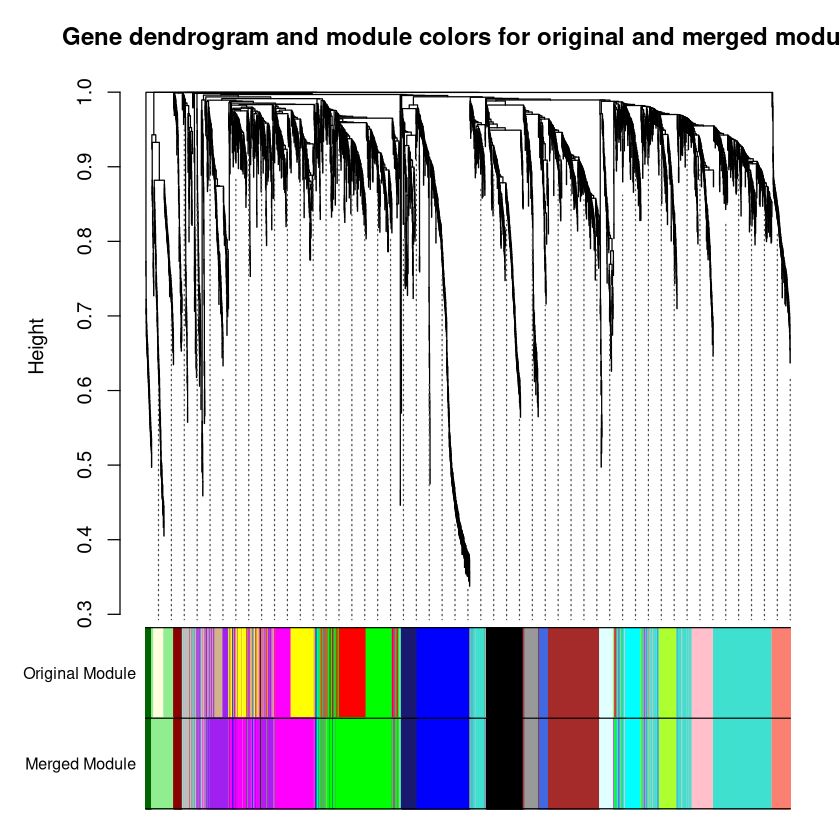

In [44]:
# a dendrogram which shows both the original AND merged module colors

plotDendroAndColors(geneTree, 
                    cbind(ModuleColors, mergedColors), 
                    c("Original Module", "Merged Module"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors for original and merged modules")

In [45]:
print("Matching the External Traits")

[1] "Matching the External Traits"


In [46]:
# Compute correlations: each module eigengene to each trait variable cor(MEs, traitDat)

In [47]:
traitData <- read.csv("ClinicalTraits.csv", header = TRUE, stringsAsFactors = FALSE)
head(traitData, 2)

,X,Mice,Number,Mouse_ID,Strain,sex,DOB,parents,Western_Diet,Sac_Date,⋯,Adiponectin,Aortic.lesions,Note,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,1,F2_290,290,306-4,"BxH ApoE-/-, F2",2,2002-03-22,229232,2002-05-14,2002-09-11,⋯,11.274,496250,NA,16,0,17,0,0,NA,NA
2,2,F2_291,291,307-1,"BxH ApoE-/-, F2",2,2002-03-22,232,2002-05-14,2002-09-11,⋯,7.099,NA,NA,16,4,0,2,4,0.0548,0.0773


In [48]:
allTraits <- traitData[, -c(31, 16)]   # removing notes and comments sections 
allTraits <- allTraits[, c(2, 11:36) ] # pulling out only continuous traits 
head(allTraits, 2)
tail(allTraits, 2)

,Mice,weight_g,length_cm,ab_fat,other_fat,total_fat,X100xfat_weight,Trigly,Total_Chol,HDL_Chol,⋯,Leptin_pg_ml,Adiponectin,Aortic.lesions,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,F2_290,36.9,9.9,2.53,2.26,4.79,12.98103,53,1167,50,⋯,245462.00,11.274,496250,16,0,17,0,0,NA,NA
2,F2_291,48.5,10.7,2.90,2.97,5.87,12.10309,61,1230,32,⋯,84420.88,7.099,NA,16,4,0,2,4,0.0548,0.0773


,Mice,weight_g,length_cm,ab_fat,other_fat,total_fat,X100xfat_weight,Trigly,Total_Chol,HDL_Chol,⋯,Leptin_pg_ml,Adiponectin,Aortic.lesions,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
360,F2_288,37.7,10.2,2.04,2.01,4.05,10.74271,27,1469,25,⋯,109760,20.552,235250,26,10,0,0,0,0.0553,0.0750
361,F2_289,37.2,10.2,2.42,1.90,4.32,11.61290,70,1331,26,⋯,71692,12.566,322500,23,5,9,0,0,0.0558,0.0763


In [49]:
# you must match the trait data to the expression data by the sample number

In [50]:
# 1. Get sample names from expression matrix
Samples <- rownames(expression.data)

# 2. Clean sample names to avoid case/space mismatch
Samples_clean <- trimws(tolower(Samples))
Traits_clean <- trimws(tolower(allTraits$Mice))

# 3. Match cleaned sample names
traitRows <- match(Samples_clean, Traits_clean)

# 4. Identify unmatched samples (if any)
if (any(is.na(traitRows))) {
  cat("⚠️ The following samples were not matched in allTraits$Mice:\n")
  print(Samples[is.na(traitRows)])

  # Optionally drop unmatched samples from expression matrix
  validSamples <- Samples[!is.na(traitRows)]
  expression.data <- expression.data[validSamples, ]
  Samples <- rownames(expression.data)

  # Re-run match on filtered samples
  Samples_clean <- trimws(tolower(Samples))
  traitRows <- match(Samples_clean, Traits_clean)
}

# 5. Extract traits and set row names to match expression data
datTraits <- allTraits[traitRows, -1]
rownames(datTraits) <- allTraits[traitRows, 1]

# 6. Final alignment sanity check
stopifnot(identical(rownames(datTraits), rownames(expression.data)))

# 7. Optional: view result
head(datTraits, 2)
tail(datTraits, 2)
dim(datTraits)
dim(expression.data)

identical(rownames(datTraits), rownames(expression.data))

,weight_g,length_cm,ab_fat,other_fat,total_fat,X100xfat_weight,Trigly,Total_Chol,HDL_Chol,UC,⋯,Leptin_pg_ml,Adiponectin,Aortic.lesions,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
F2_2,38.0,10.5,3.81,2.78,6.59,17.34211,14,1646,34,668,⋯,NA,NA,224500,56,5,0,0,0,NA,NA
F2_3,33.5,10.8,1.70,2.05,3.75,11.19403,109,1216,27,402,⋯,15148.76,14.339,296250,8,4,NA,0,0,NA,NA


,weight_g,length_cm,ab_fat,other_fat,total_fat,X100xfat_weight,Trigly,Total_Chol,HDL_Chol,UC,⋯,Leptin_pg_ml,Adiponectin,Aortic.lesions,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
F2_355,40.9,10.4,2.78,1.91,4.69,11.46699,199,663,30,280,⋯,55794.9,12.134,109500,22,0,0,NA,NA,0.0564,0.07865
F2_357,45.7,10.8,4.45,2.69,7.14,15.62363,44,1118,51,326,⋯,169716.4,NA,214750,27,5,0,NA,NA,NA,NA


[1] 134  26

[1]  134 3600

[1] TRUE

In [51]:
identical(rownames(mergedMEs), rownames(datTraits))

# Fix row order of datTraits
datTraits <- datTraits[match(rownames(mergedMEs), rownames(datTraits)), ]
stopifnot(identical(rownames(mergedMEs), rownames(datTraits)))

[1] TRUE

In [52]:
# Table of module – trait correlations
# • Identify modules highly correlated to traits of interest
# • Identify traits highly correlated to multiple modules

In [53]:
print("Module-Trait associations")

[1] "Module-Trait associations"


In [54]:
# Define numbers of genes and samples
nGenes = ncol(expression.data)
nSamples = nrow(expression.data)

nGenes
nSamples

module.trait.correlation = cor(mergedMEs, datTraits, use = "p")            # p for pearson correlation coefficient 
module.trait.Pvalue = corPvalueStudent(module.trait.correlation, nSamples) # calculate the p-value associated with the correlation

head(module.trait.correlation, 2)
head(module.trait.Pvalue, 2)

[1] 3600

[1] 134

,weight_g,length_cm,ab_fat,other_fat,total_fat,X100xfat_weight,Trigly,Total_Chol,HDL_Chol,UC,⋯,Leptin_pg_ml,Adiponectin,Aortic.lesions,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
MElightgreen,-0.01741811,0.08035027,-0.005618515,-0.03267382,-0.01663396,-0.06291989,0.02304367,-0.03737039,0.05258118,-0.07360955,⋯,-0.06350145,0.05067053,0.01547314,-0.001142324,0.19064881,-0.09420819,-0.05278844,-0.03407491,0.08005004,0.01533086
MEblack,-0.31277458,-0.15465924,-0.273439183,-0.14850971,-0.23595121,-0.17969563,-0.07327731,-0.15645232,-0.07070593,-0.19597639,⋯,-0.36565007,-0.11679100,0.17564943,0.095376248,0.08380901,0.04383279,0.03030439,-0.04330367,-0.27105225,-0.29327741


,weight_g,length_cm,ab_fat,other_fat,total_fat,X100xfat_weight,Trigly,Total_Chol,HDL_Chol,UC,⋯,Leptin_pg_ml,Adiponectin,Aortic.lesions,Aneurysm,Aortic_cal_M,Aortic_cal_L,CoronaryArtery_Cal,Myocardial_cal,BMD_all_limbs,BMD_femurs_only
MElightgreen,0.8416719204,0.35605884,0.948627688,0.70782149,0.848712607,0.47014520,0.7915598,0.66814845,0.5462517,0.39796755,⋯,4.660434e-01,0.5609491,0.85915722,0.9895484,0.02734738,0.2789275,0.5446688,0.6958980,0.357864763,0.8604391395
MEblack,0.0002337232,0.07437667,0.001389687,0.08679936,0.006058325,0.03774786,0.4001064,0.07103824,0.4168897,0.02324461,⋯,1.396139e-05,0.1789835,0.04235132,0.2729836,0.33566523,0.6150421,0.7281466,0.6193208,0.001536075,0.0005837183


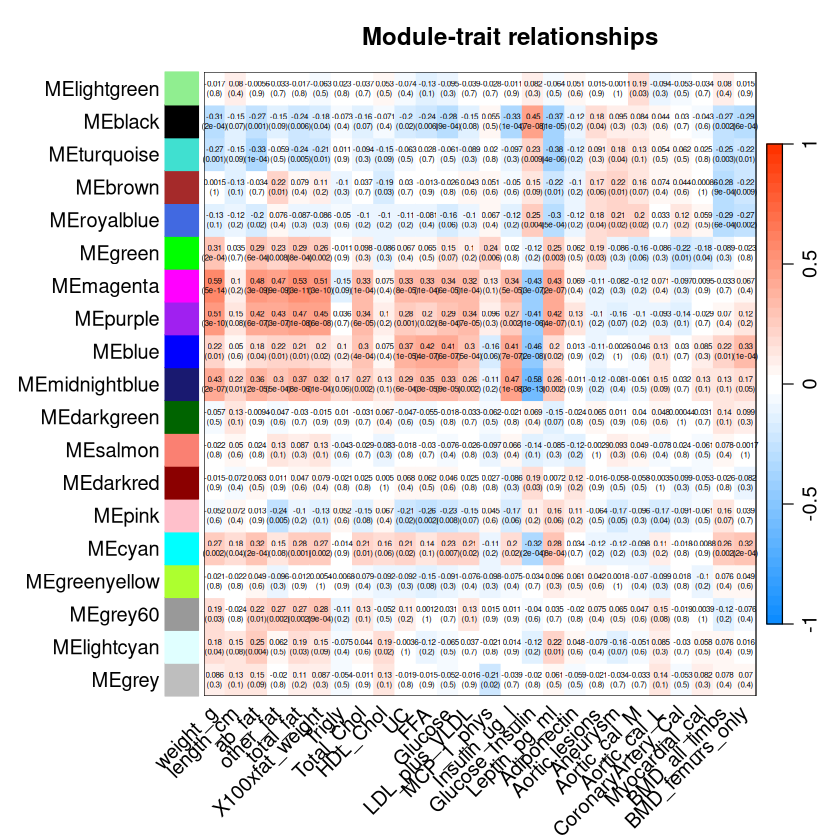

In [55]:
# Will display correlations and their p-values

textMatrix = paste(signif(module.trait.correlation, 2), "\n(",
signif(module.trait.Pvalue, 1), ")", sep = "");
dim(textMatrix) = dim(module.trait.correlation)
par(mar = c(6, 8.5, 3, 1))

# Display the correlation values within a heatmap plot

labeledHeatmap(Matrix = module.trait.correlation,
               xLabels = names(datTraits),
               yLabels = names(mergedMEs),
               ySymbols = names(mergedMEs),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 0.4,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))

In [56]:
# Each row corresponds to a module eigengene, and the columns correspond to a trait. Each cell contains a p-value and correlation. 
# Those with strong positive correlations are shaded a darker red while those with stronger negative correlations become more blue.

In [57]:
print("Target Gene Identification")

[1] "Target Gene Identification"


In [58]:
# You can use the gene significance along with the genes intramodular connectivity to identify potential target genes associated 
# with a particular trait of interest. For this analysis weight will be the clinical trait.

# Connectivity - how connected a speficic node is in the network (how many nodes have high correlation with that node). 
# High connectivity indicates a hub gene (central to many nodes). 

# Whole Network connectivity - a measure for how well the node is connected throughout the entire system 
# Intramodular connectivity - a measure for how well the node is connected within its assigned module. 
# Also an indicator for how well that node belongs to its module. This is also known as module membership.

In [59]:
# Potential driver genes
# Strategy:
# Identify those genes within a module that are
# 1) Highly connected within the module (hub genes)
# AND
# 2) Most strongly correlated with a clinical/phenotypical trait of interest

In [60]:
# How to detect hub genes inside a module?

# The straightforward way: gene(s) with highest intramodular connectivity (= sum of in-module edge weights)
# Alternative way proposed in WGCNA: gene(s) with highest module membership

In [61]:
# Module Membership of Genes

# Module membership: Correlation of a gene to a module eigengene
# • Genes with high module membership are good representatives of the overall expression profile in the module
# • Genes with high module membership tend to be “hub” genes in the module (high intramodule connectivity)
# • A gene can have high membership in several modules (not just the one to which it is assigned)

# Driver genes : most correlated with both module and trait (picked by visual inspection)

In [62]:
# The module membership/intramodular connectivity is calculated as the correlation of the eigengene and the gene expression profile. 
# This quantifies the similarity of all genes on the array to every module.

In [63]:
# Define variable weight containing the weight column of datTrait

weight = as.data.frame(datTraits$weight_g)
names(weight) = "weight"

modNames = substring(names(mergedMEs), 3) #e xtract module names

#Calculate the module membership and the associated p-values
geneModuleMembership = as.data.frame(cor(expression.data, mergedMEs, use = "p"))
MMPvalue = as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples))
names(geneModuleMembership) = paste("MM", modNames, sep="")
names(MMPvalue) = paste("p.MM", modNames, sep="")
head(MMPvalue, 2)

#Calculate the gene significance and associated p-values
geneTraitSignificance = as.data.frame(cor(expression.data, weight, use = "p"))
GSPvalue = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples))
names(geneTraitSignificance) = paste("GS.", names(weight), sep="")
names(GSPvalue) = paste("p.GS.", names(weight), sep="")
head(GSPvalue, 2)

,p.MMlightgreen,p.MMblack,p.MMturquoise,p.MMbrown,p.MMroyalblue,p.MMgreen,p.MMmagenta,p.MMpurple,p.MMblue,p.MMmidnightblue,p.MMdarkgreen,p.MMsalmon,p.MMdarkred,p.MMpink,p.MMcyan,p.MMgreenyellow,p.MMgrey60,p.MMlightcyan,p.MMgrey
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MMT00000044,0.7755660,0.42869499,6.471859e-02,0.1920018901,1.893354e-01,0.65812757,0.1002138,0.6715206,0.01647611,0.005112603,0.1010064,0.8560063,0.78723055,2.181916e-03,7.536587e-01,3.993121e-02,0.5888486297,7.625767e-01,2.196543e-12
MMT00000046,0.4944849,0.04108351,1.184869e-29,0.0001366003,2.019585e-08,0.03399544,0.2629341,0.7163613,0.89647964,0.070566013,0.9491968,0.9647501,0.04160753,1.383237e-11,1.148917e-15,2.645547e-19,0.0001000198,1.204418e-14,3.234260e-02


,p.GS.weight
,<dbl>
MMT00000044,0.4257498
MMT00000046,0.3875018


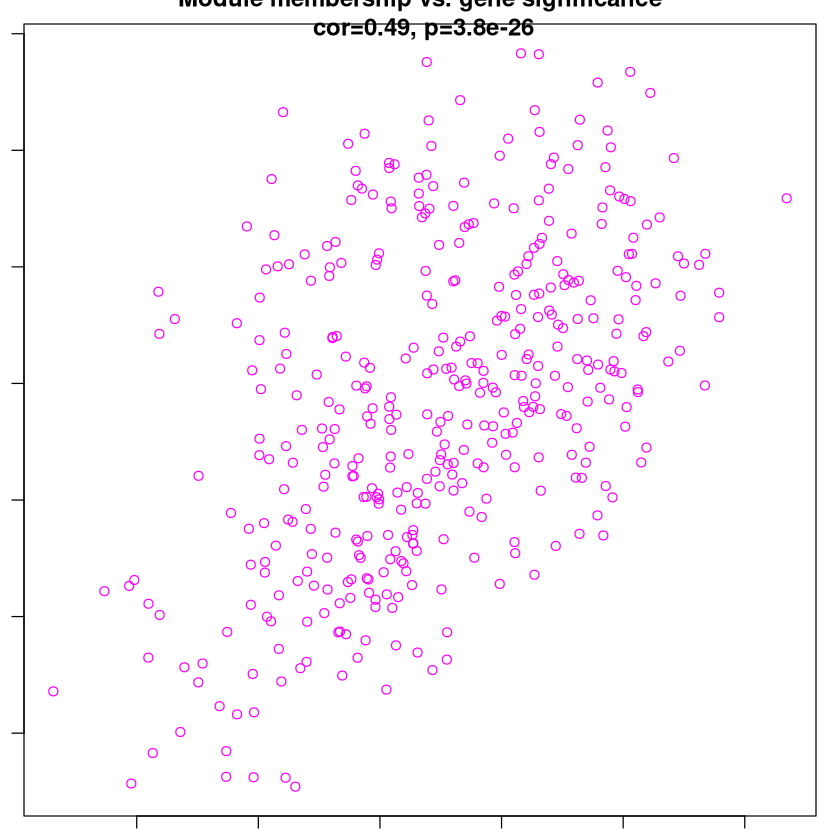

In [64]:
# Using the gene significance you can identify genes that have a high significance for weight. 
# Using the module membership measures you can identify genes with high module membership in interesting modules.

# Goal:
# To visualize the relationship between:
# Module Membership (MM): How strongly each gene belongs to a module (e.g., magenta)
# Gene Significance (GS): How correlated each gene is with a trait (e.g., body weight)
# This helps identify hub genes: genes that are both central to a module and strongly related to a phenotype.

# As an example, you can look at the magenta module as it has the highest significant association with weight (.59).
# Plot a scatter plot of gene significance vs. module membership in the magenta module.

par(mar=c(1,1,1,1))
module = "magenta"
column = match(module, modNames)
moduleGenes = mergedColors==module # Creates a logical vector identifying which genes belong to the magenta module.

verboseScatterplot(abs(geneModuleMembership[moduleGenes,column]),
                   abs(geneTraitSignificance[moduleGenes,1]),
                   xlab = paste("Module Membership in", module, "module"),
                   ylab = "Gene significance for body weight",
                   main = paste("Module membership vs. gene significance\n"),
                   cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2, col = module)


# The magenta gene significance and module membership have a positive correlation of .49 with a very significant p-value. 
# This indicates that the genes that are highly significantly associated with the trait (high gene significance) are also the genes 
# that are the most connected within their module (high module membership). 
# Therefore genes in the magenta module could be potential target genes when looking at body weight.

`geom_smooth()` using formula = 'y ~ x'


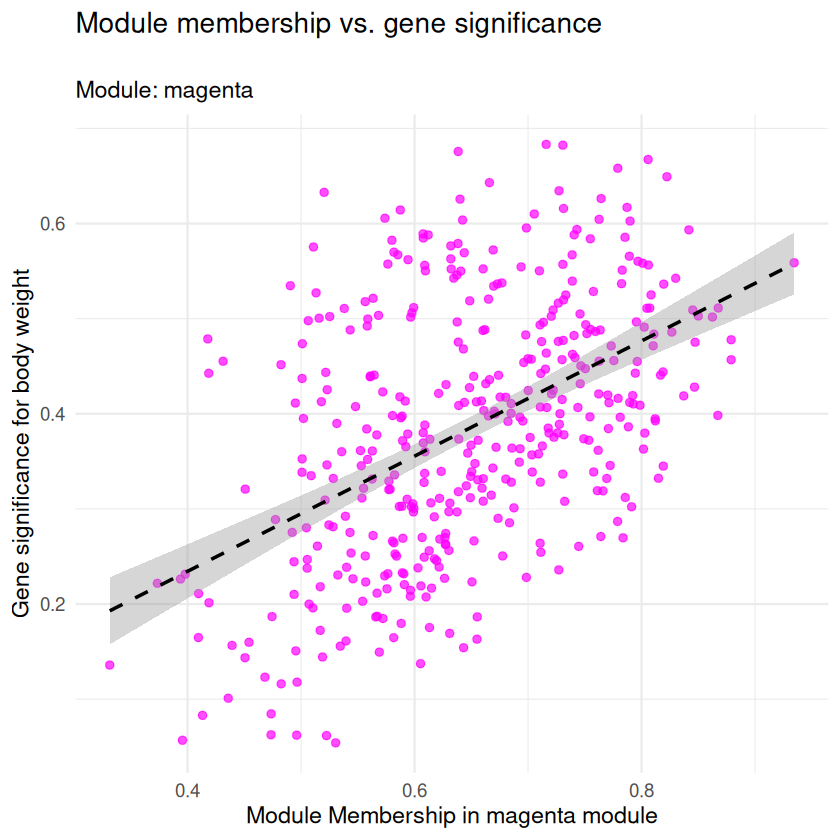

In [65]:
library(ggplot2)

# another way to display the data 
df_plot <- data.frame(
  ModuleMembership = abs(geneModuleMembership[moduleGenes, column]),
  GeneSignificance = abs(geneTraitSignificance[moduleGenes, 1])
)

ggplot(df_plot, aes(x = ModuleMembership, y = GeneSignificance)) +
  geom_point(color = module, alpha = 0.7, size = 2) +
  geom_smooth(method = "lm", color = "black", linetype = "dashed") +
  labs(
    title = paste("Module membership vs. gene significance\n"),
    subtitle = paste("Module:", module),
    x = paste("Module Membership in", module, "module"),
    y = "Gene significance for body weight"
  ) +
  theme_minimal(base_size = 14)


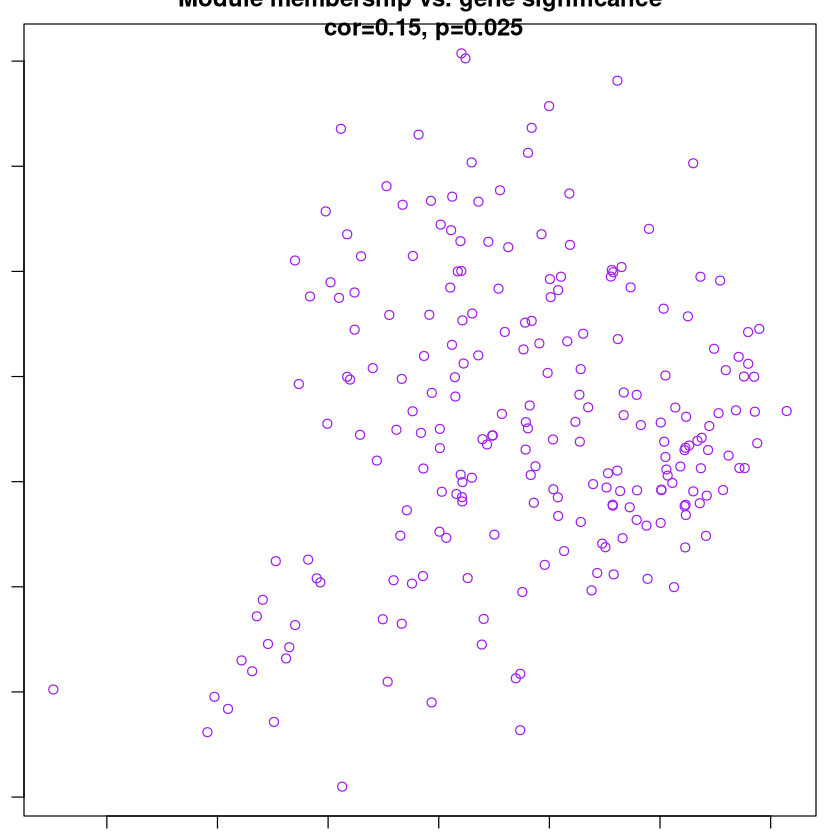

In [66]:
# Considering another module - "purple"
# Does the module you selected contain potential candidate genes ?

par(mar=c(1,1,1,1))
module = "purple"
column = match(module, modNames)
moduleGenes = mergedColors==module

verboseScatterplot(abs(geneModuleMembership[moduleGenes,column]),
                  abs(geneTraitSignificance[moduleGenes,1]),
                  xlab = paste("Module Membership in", module, "module"),
                  ylab = "Gene significance for body weight",
                  main = paste("Module membership vs. gene significance\n"),
                  cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2, col = module)

`geom_smooth()` using formula = 'y ~ x'


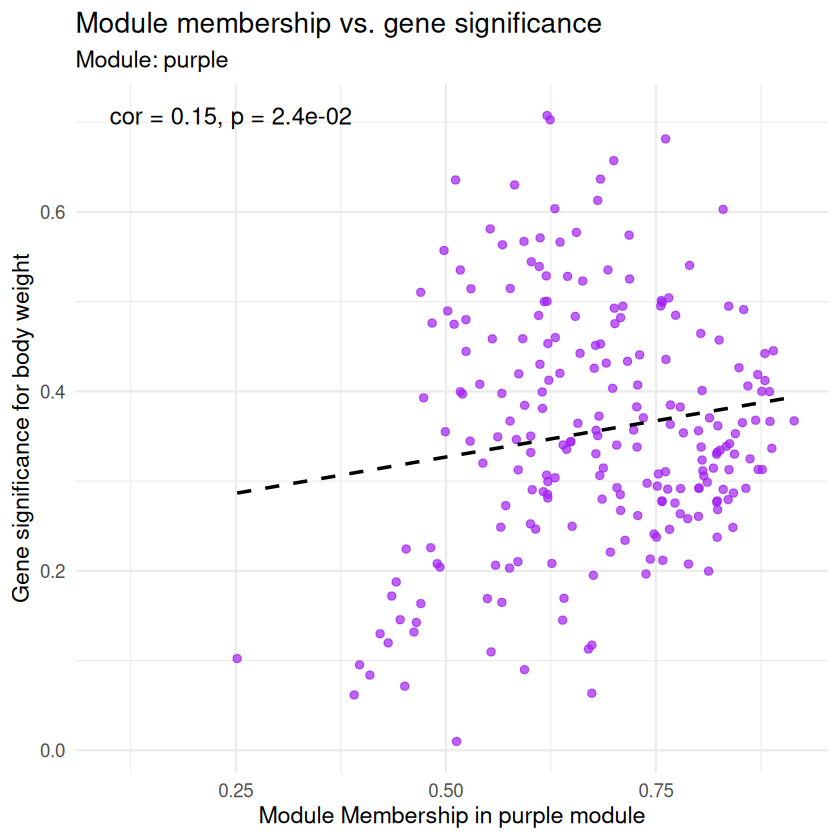

In [67]:
# ggplot2 version of the figure :

library(ggplot2)

# 1. Define module and match relevant column
module <- "purple"
column <- match(module, modNames)
moduleGenes <- mergedColors == module

# 2. Create a data frame with absolute values
df_plot <- data.frame(
  ModuleMembership = abs(geneModuleMembership[moduleGenes, column]),
  GeneSignificance = abs(geneTraitSignificance[moduleGenes, 1])
)

# 3. Compute correlation and p-value
cor_val <- cor(df_plot$ModuleMembership, df_plot$GeneSignificance)
p_val <- cor.test(df_plot$ModuleMembership, df_plot$GeneSignificance)$p.value

# 4. Create ggplot
ggplot(df_plot, aes(x = ModuleMembership, y = GeneSignificance)) +
  geom_point(color = module, size = 2, alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed") +
  labs(
    title = "Module membership vs. gene significance",
    subtitle = paste("Module:", module),
    x = paste("Module Membership in", module, "module"),
    y = "Gene significance for body weight"
  ) +
  annotate(
    "text",
    x = 0.1, y = max(df_plot$GeneSignificance),
    label = sprintf("cor = %.2f, p = %.1e", cor_val, p_val),
    hjust = 0, size = 5
  ) +
  theme_minimal(base_size = 14)


In [68]:
print("Network Visualization of Eigengenes")
# It is also possible to study the relationship among found modules. 
# One way to do this is to quantify module similarity (adjacency) by calculating the pairwise correlation of representative eigengenes.

# You are able to generate a summary plot of the eigengene correlations using the function plotEigengeneNetworks(). 
# To visualize how the trait fits into the eigengene network you can bind the trait data to the module eigengenes 
# and argue the data frame to plotEigengeneNetworks() which will display the relationship on a heatmap.

[1] "Network Visualization of Eigengenes"


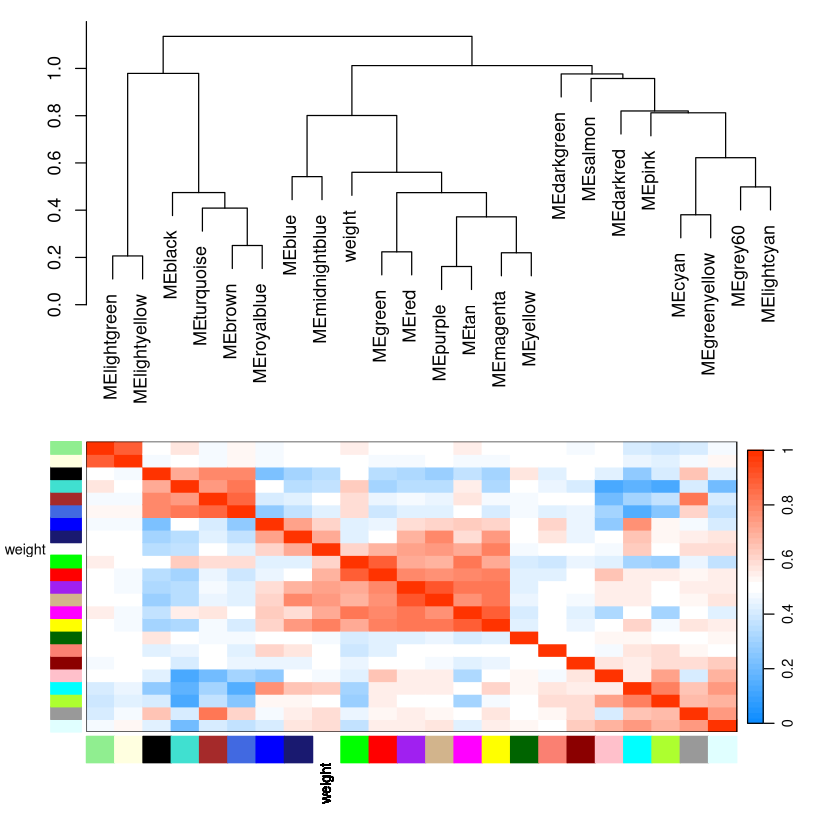

In [69]:
# Isolate weight from the clinical traits
weight = as.data.frame(datTraits$weight_g);
names(weight) = "weight"

# Add the weight to existing module eigengenes
MET = orderMEs(cbind(MEs, weight))

# Plot the relationships among the eigengenes and the trait
par(cex = 0.9)
plotEigengeneNetworks(MET, "", 
                      marDendro = c(0,4,1,2), 
                      marHeatmap = c(5,4,1,2), 
                      cex.lab = 0.8, xLabelsAngle = 90)

# With this heatmap you can identify groups of correlated eigengenes called meta modules. 
# Modules with mutual correlations stronger than their correlation with the specified clinical trait would be grouped into a meta module.

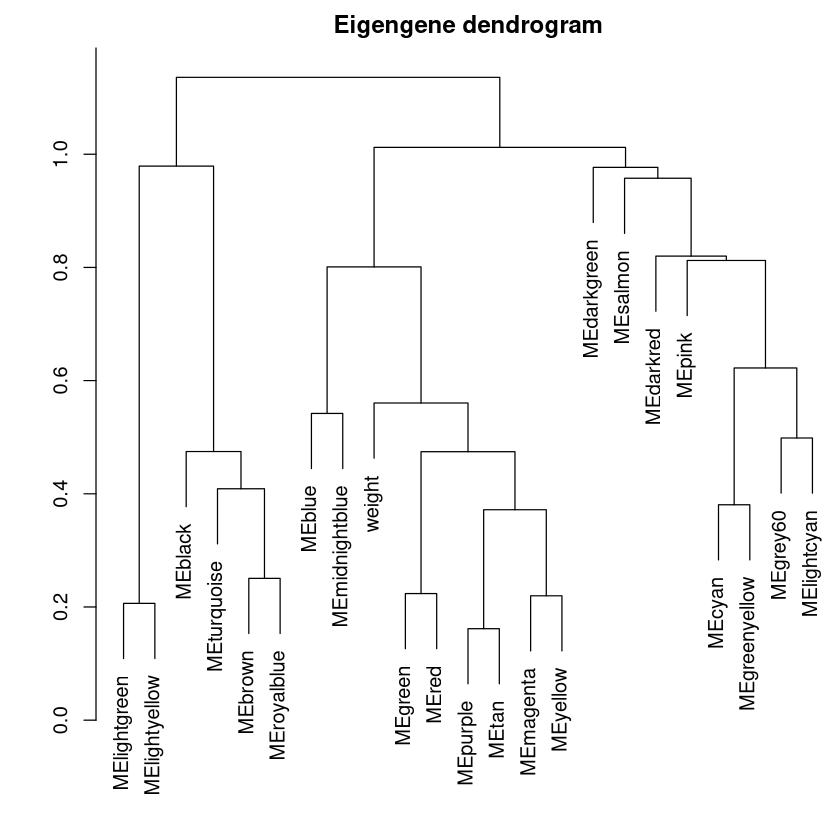

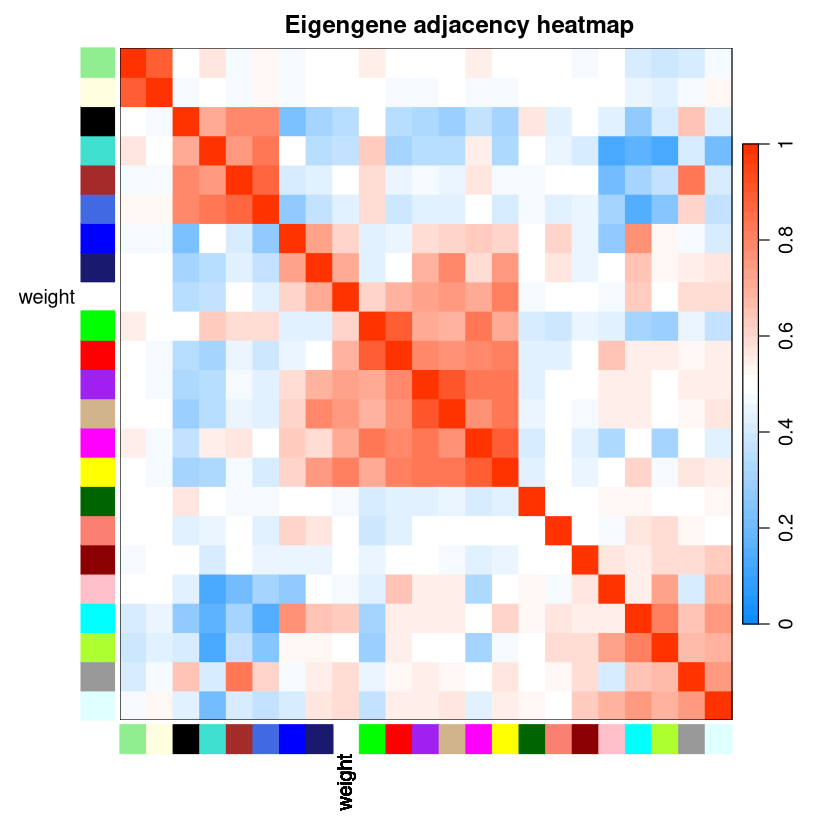

In [70]:
# Another way to show the data :

# Plot the dendrogram
par(cex = 1.0)
plotEigengeneNetworks(MET, "Eigengene dendrogram", marDendro = c(0,4,2,0), plotHeatmaps = FALSE)

# Plot the heatmap matrix (note: this plot will overwrite the dendrogram plot)
par(cex = 1.0, mar = c(1,1,1,1))
plotEigengeneNetworks(MET, "Eigengene adjacency heatmap", 
                      marHeatmap = c(5,5,2,2),
                      plotDendrograms = FALSE, 
                      xLabelsAngle = 90)

In [71]:
# Create a dendrogram and heatmap using two clinical traits. For example, weight AND Glucose.

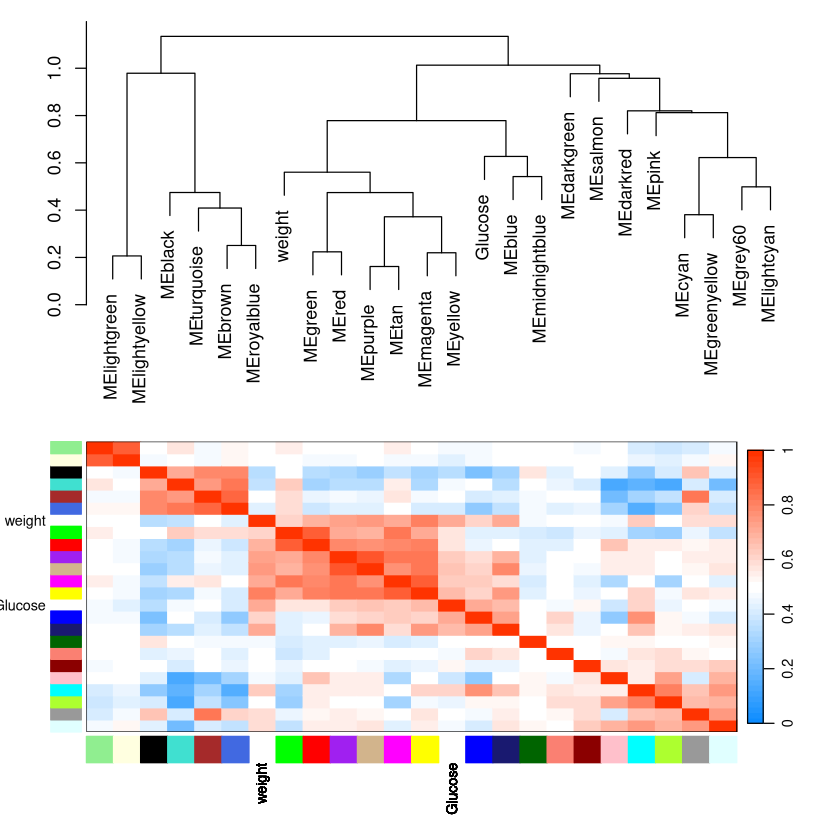

In [72]:
# Isolate weight and Glucose from the clinical traits

weight = as.data.frame(datTraits$weight_g);
names(weight) = "weight"
Glucose = as.data.frame(datTraits$Glucose)
names(Glucose) = "Glucose"

# Add the weight to existing module eigengenes
MET = orderMEs(cbind(MEs, weight,Glucose))

# Plot the relationships among the eigengenes and the trait
par(cex = 0.9)
plotEigengeneNetworks(MET, "", 
                      marDendro = c(0,4,1,2), 
                      marHeatmap = c(5,4,1,2), 
                      cex.lab = 0.8, xLabelsAngle = 90)

In [73]:
# Quality checks on modules :

# Connectivity
# mean intra-module connectivity
# mean ratio of intra-module / total connectivity
# Trait correlations
# strong correlation between module eigengenes and traits of interest
# strong correlation between gene module membership and gene-trait corr.
# Functional enrichment
# many functionally related genes in the same module : GO / pathway analysis

In [74]:
# Assessing modules by intramodular connectivity
# • Simple ranking of modules (highest to lowest mean connectivity)
# • Statistical analysis : obtain p-values, e.g. via bootstrap